In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from tqdm.auto import tqdm
from sklearn import preprocessing
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("D:\Sacred heart Projects\intro to data and programming\ANALYSIS OF CAR INSURANCE CLAIM PREDICTION\Raw fiels\\train.csv")

In [3]:
df.head()

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
4,ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,...,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0


In [4]:
#numerical features
numerical= df.select_dtypes(include =[np.float64,np.int64])
print("Numerical Features in DataSet:",numerical.shape[1])
print(numerical.columns)

Numerical Features in DataSet: 16
Index(['policy_tenure', 'age_of_car', 'age_of_policyholder',
       'population_density', 'make', 'airbags', 'displacement', 'cylinder',
       'gear_box', 'turning_radius', 'length', 'width', 'height',
       'gross_weight', 'ncap_rating', 'is_claim'],
      dtype='object')


In [5]:
bar_claim_values =  df.is_claim.value_counts()
print(bar_claim_values)

0    54844
1     3748
Name: is_claim, dtype: int64


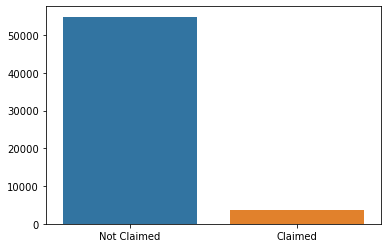

In [6]:
#Visualising the output on nof people made a claim in the first 6 months and who didnt
fig = sns.barplot(x = ["Not Claimed","Claimed"], y = [bar_claim_values[0],bar_claim_values[1]])

In [7]:
#using the lable encoding to covert all the catagorical variable into numerical.
for columns in tqdm(df.columns):
    if dict(df.dtypes)[columns] == 'object':        
        label_encoder = preprocessing.LabelEncoder()
        df[columns] = label_encoder.fit_transform(df[columns])

  0%|          | 0/44 [00:00<?, ?it/s]

In [8]:
df.head()

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,0,0.515874,0.05,0.644231,0,4990,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
1,1,0.672619,0.02,0.375000,11,27003,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
2,2,0.841110,0.02,0.384615,15,4076,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
3,3,0.900277,0.11,0.432692,16,21622,1,3,3,2,...,1,1,1,1,1,1,1,1,2,0
4,4,0.596403,0.11,0.634615,17,34738,2,0,4,2,...,0,1,1,1,0,1,1,1,2,0


In [9]:
df.dtypes

policy_id                             int32
policy_tenure                       float64
age_of_car                          float64
age_of_policyholder                 float64
area_cluster                          int32
population_density                    int64
make                                  int64
segment                               int32
model                                 int32
fuel_type                             int32
max_torque                            int32
max_power                             int32
engine_type                           int32
airbags                               int64
is_esc                                int32
is_adjustable_steering                int32
is_tpms                               int32
is_parking_sensors                    int32
is_parking_camera                     int32
rear_brakes_type                      int32
displacement                          int64
cylinder                              int64
transmission_type               

In [10]:
col_names = df.columns
print(col_names[0])

policy_id


In [11]:
#calculating the corelation between the features
corr_matrix = df.corr().abs()
print(corr_matrix)

upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(np.bool))
print(upper_tri)

                                  policy_id  policy_tenure  age_of_car  \
policy_id                          1.000000       0.000369    0.002214   
policy_tenure                      0.000369       1.000000    0.166312   
age_of_car                         0.002214       0.166312    1.000000   
age_of_policyholder                0.003494       0.143676    0.035427   
area_cluster                       0.000769       0.035666    0.049342   
population_density                 0.005639       0.100307    0.062255   
make                               0.001908       0.086101    0.188122   
segment                            0.005690       0.172310    0.360144   
model                              0.002067       0.200052    0.365221   
fuel_type                          0.001247       0.183302    0.341563   
max_torque                         0.000280       0.121494    0.218577   
max_power                          0.004339       0.058703    0.100455   
engine_type                        0.0

C:\Users\balij\AppData\Local\Temp\ipykernel_22616\678823804.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(np.bool))


<AxesSubplot:>

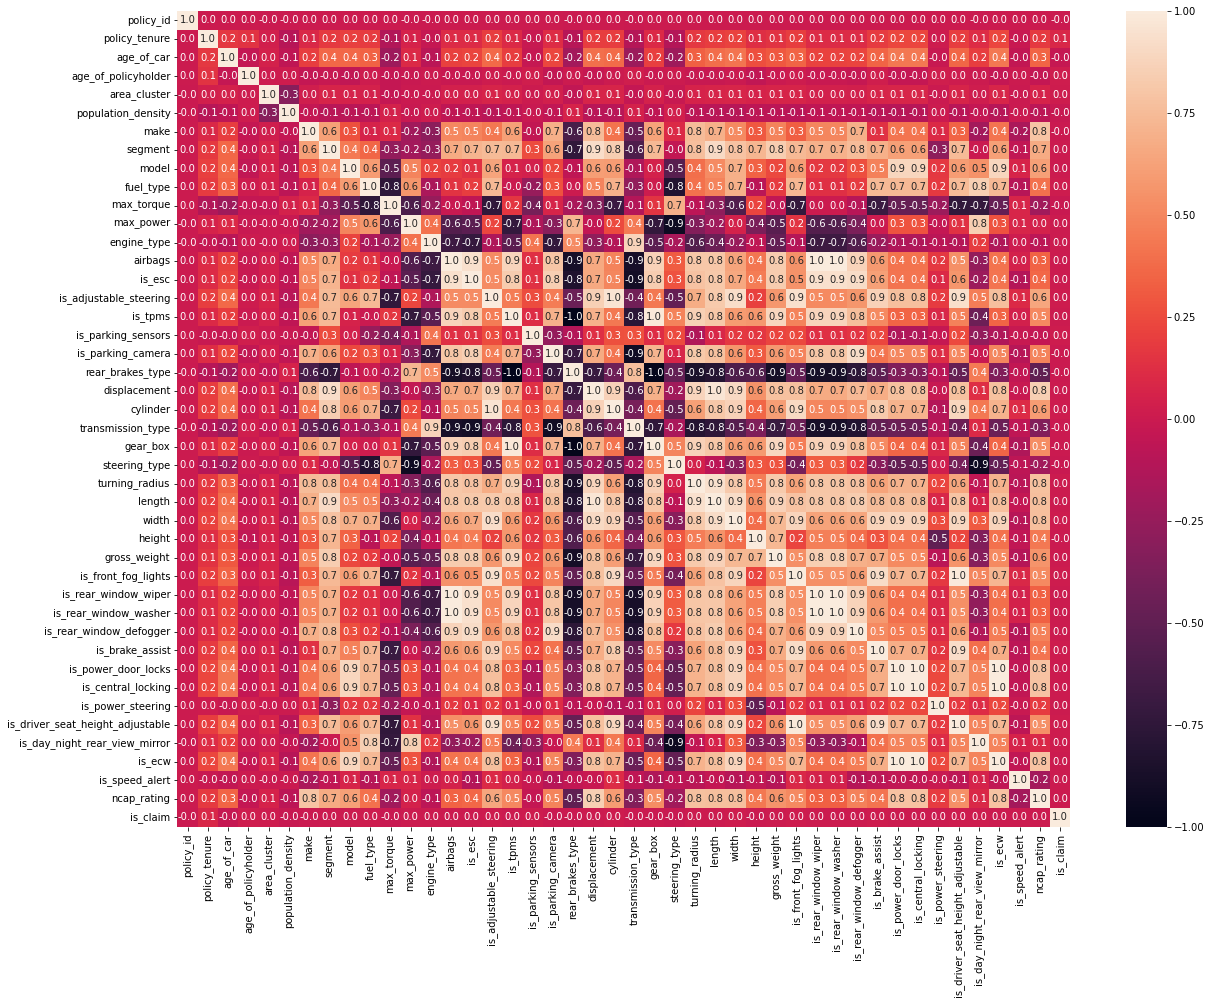

In [12]:
plt.figure(figsize=(20,15))
heat_map = sns.heatmap(df.corr(),annot = True, fmt = '0.1f')
heat_map

In [13]:
#picking the coloumns with highest(greater than 95%) corelation to drop those features.
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)] 
print(to_drop)

['rear_brakes_type', 'cylinder', 'gear_box', 'length', 'is_rear_window_wiper', 'is_rear_window_washer', 'is_central_locking', 'is_driver_seat_height_adjustable', 'is_ecw']


In [14]:
#dropping the features
df1 = df.drop(df[to_drop], axis=1)
print();
print(df1.head())


   policy_id  policy_tenure  age_of_car  age_of_policyholder  area_cluster  \
0          0       0.515874        0.05             0.644231             0   
1          1       0.672619        0.02             0.375000            11   
2          2       0.841110        0.02             0.384615            15   
3          3       0.900277        0.11             0.432692            16   
4          4       0.596403        0.11             0.634615            17   

   population_density  make  segment  model  fuel_type  ...  gross_weight  \
0                4990     1        0      0          0  ...          1185   
1               27003     1        0      0          0  ...          1185   
2                4076     1        0      0          0  ...          1185   
3               21622     1        3      3          2  ...          1335   
4               34738     2        0      4          2  ...          1155   

   is_front_fog_lights  is_rear_window_defogger  is_brake_assist  \

#After dropping the highly corelative features we would have 35 feature which were actually 44.

In [15]:
area_and_claim = pd.crosstab(df['area_cluster'],df['is_claim'])
area_and_claim_with_percent_claim = area_and_claim.apply(lambda r: r/r.sum(), axis=1)


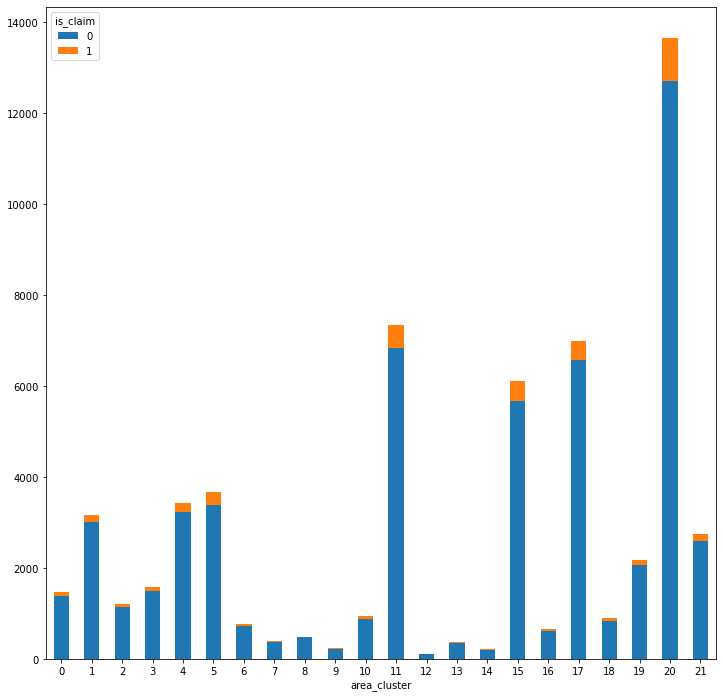

In [16]:
area_and_claim.plot(kind="bar", stacked=True,rot=0, figsize=(12, 12))
plt.show()

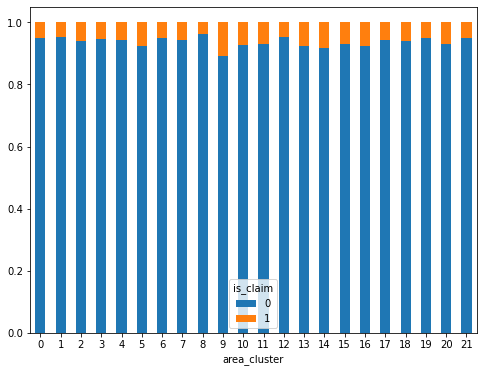

In [17]:
area_and_claim_with_percent_claim.plot(kind="bar", stacked=True,rot=0, figsize=(8, 6))
plt.show()

#From the above bar chart we can understand that area cluster 9 has the highest percent of claims within the first 6 months of the policy terneure.

In [18]:
make_and_claim = pd.crosstab(df['make'],df['is_claim'])
make_and_claim_percent = make_and_claim.apply(lambda r: r/r.sum(), axis=1)

In [19]:
make_and_claim_percent

is_claim,0,1
make,,
1,0.935608,0.064392
2,0.946060,0.053940
3,0.935725,0.064275
4,0.933197,0.066803
5,0.937086,0.062914


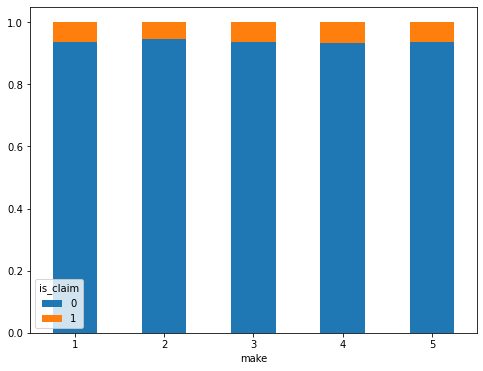

In [20]:
make_and_claim_percent.plot(kind="bar", stacked=True,rot=0, figsize=(8, 6))
plt.show()

#The fourth car maker has slightly higher claims than the remaining makers.

In [21]:
seg_and_claim = pd.crosstab(df['segment'],df['is_claim'])
seg_and_claim_percent = seg_and_claim.apply(lambda r: r/r.sum(), axis=1)
seg_and_claim_percent

is_claim,0,1
segment,,
0,0.939611,0.060389
1,0.941529,0.058471
2,0.931419,0.068581
3,0.935901,0.064099
4,0.935725,0.064275
5,0.939620,0.060380


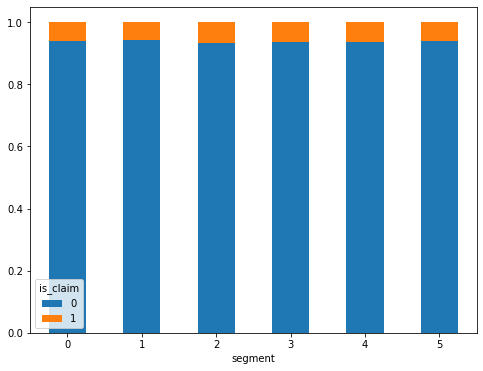

In [22]:
seg_and_claim_percent.plot(kind="bar", stacked=True,rot=0, figsize=(8, 6))
plt.show()

#Segment 2 cars have slighly higher claims than others.

In [23]:
ncap_clus_and_claim = pd.crosstab([df['ncap_rating'],df['area_cluster']],df['is_claim'])
ncap_clus_and_claim_percent = ncap_clus_and_claim.apply(lambda r: r/r.sum(), axis=1)

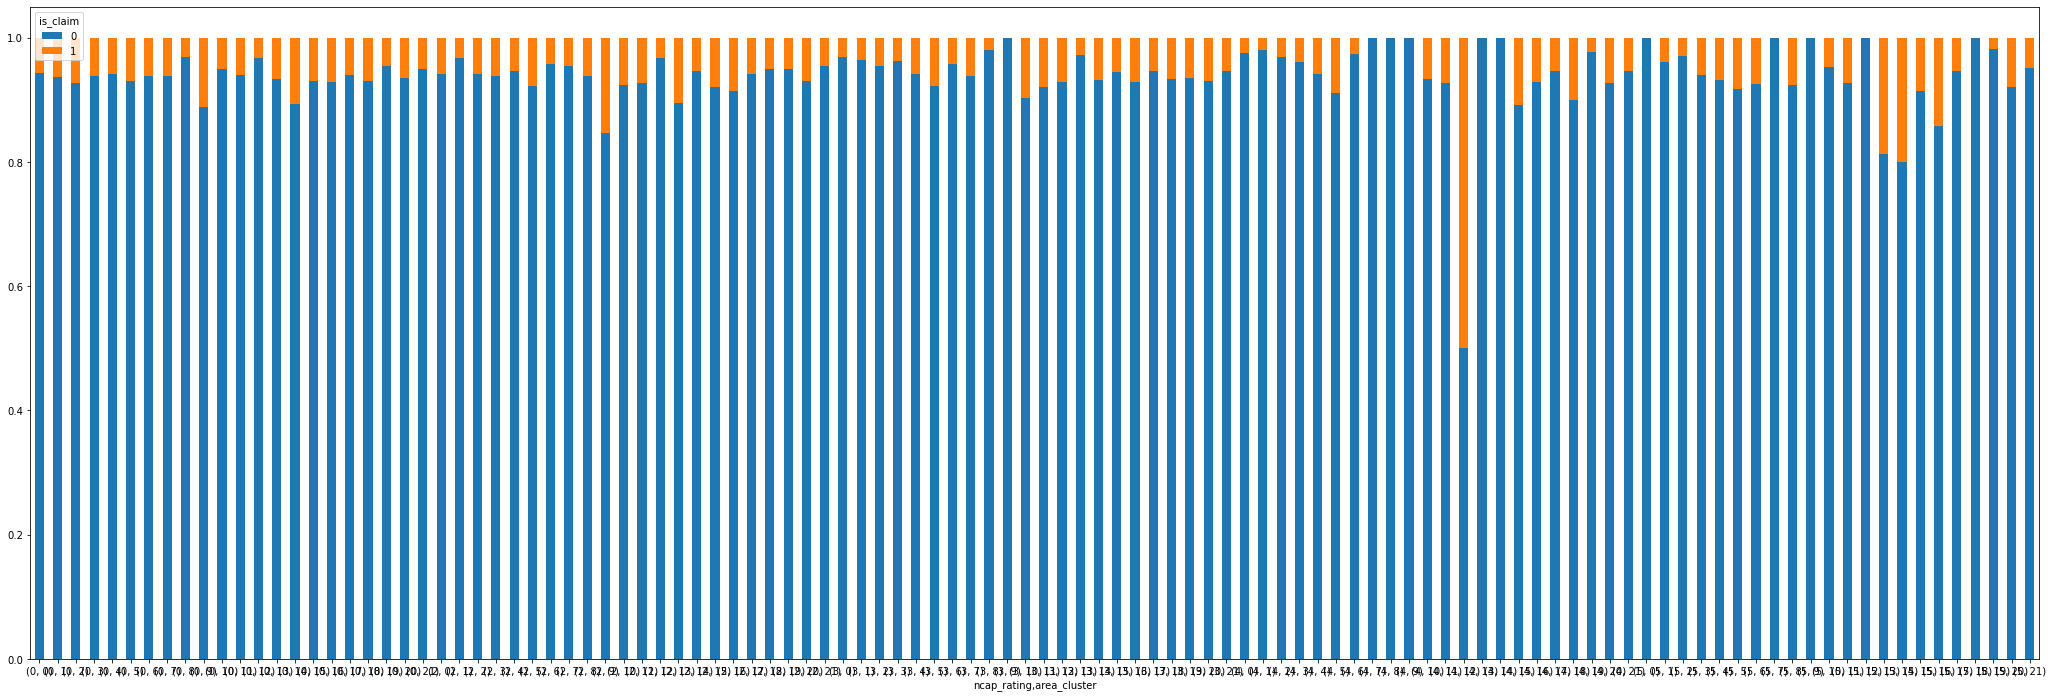

In [24]:
ncap_clus_and_claim_percent.plot(kind="bar", stacked=True,rot=0, figsize=(36, 12))
plt.show()

In [25]:
ncap_clus_and_claim_percent[75:90]

is_claim                         0         1
ncap_rating area_cluster                    
4           9             1.000000  0.000000
            10            0.933333  0.066667
            11            0.926518  0.073482
            12            0.500000  0.500000
            13            1.000000  0.000000
            14            1.000000  0.000000
            15            0.892086  0.107914
            16            0.928571  0.071429
            17            0.945946  0.054054
            18            0.900000  0.100000
            19            0.976471  0.023529
            20            0.927505  0.072495
            21            0.946903  0.053097
5           0             1.000000  0.000000
            1             0.961165  0.038835

#cars with ncap_rating 4 in area_cluster 12 have the highest number of claims.

In [26]:
df1.columns

Index(['policy_id', 'policy_tenure', 'age_of_car', 'age_of_policyholder',
       'area_cluster', 'population_density', 'make', 'segment', 'model',
       'fuel_type', 'max_torque', 'max_power', 'engine_type', 'airbags',
       'is_esc', 'is_adjustable_steering', 'is_tpms', 'is_parking_sensors',
       'is_parking_camera', 'displacement', 'transmission_type',
       'steering_type', 'turning_radius', 'width', 'height', 'gross_weight',
       'is_front_fog_lights', 'is_rear_window_defogger', 'is_brake_assist',
       'is_power_door_locks', 'is_power_steering',
       'is_day_night_rear_view_mirror', 'is_speed_alert', 'ncap_rating',
       'is_claim'],
      dtype='object')

In [27]:
age_and_claim = pd.crosstab(df1['age_of_policyholder'],df1['is_claim'],rownames=['age_of_policyholder'])

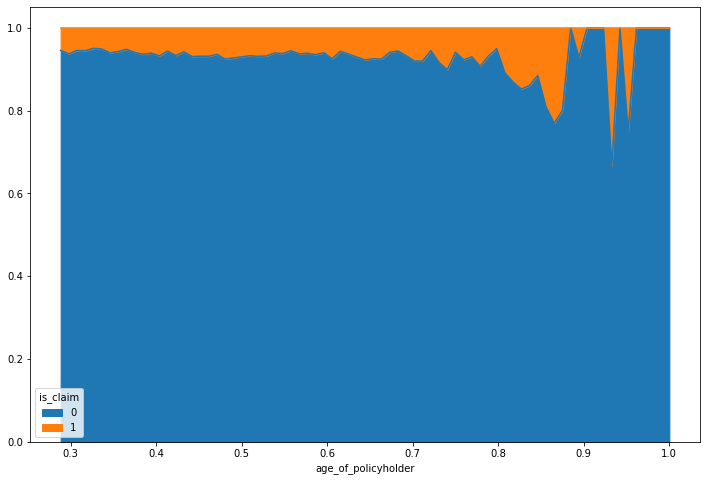

<AxesSubplot:xlabel='age_of_policyholder'>

In [28]:
age_and_claim_percent = age_and_claim.apply(lambda r: r/r.sum(), axis=1)
age_and_claim_percent_fig = age_and_claim_percent.plot.area(figsize = (12,8))
plt.show()
age_and_claim_percent_fig

#Older people tend to make more claims than the younger ones.

In [29]:
sorted(df['age_of_policyholder'].unique())

[0.288461538461538,
 0.298076923076923,
 0.307692307692308,
 0.317307692307692,
 0.326923076923077,
 0.336538461538461,
 0.346153846153846,
 0.355769230769231,
 0.365384615384615,
 0.375,
 0.384615384615385,
 0.394230769230769,
 0.403846153846154,
 0.413461538461538,
 0.423076923076923,
 0.432692307692308,
 0.442307692307692,
 0.451923076923077,
 0.461538461538462,
 0.471153846153846,
 0.480769230769231,
 0.490384615384615,
 0.5,
 0.509615384615385,
 0.519230769230769,
 0.528846153846154,
 0.538461538461538,
 0.548076923076923,
 0.557692307692308,
 0.567307692307692,
 0.576923076923077,
 0.586538461538462,
 0.596153846153846,
 0.605769230769231,
 0.615384615384615,
 0.625,
 0.634615384615385,
 0.644230769230769,
 0.653846153846154,
 0.663461538461538,
 0.673076923076923,
 0.682692307692308,
 0.692307692307692,
 0.701923076923077,
 0.711538461538462,
 0.721153846153846,
 0.730769230769231,
 0.740384615384615,
 0.75,
 0.759615384615385,
 0.769230769230769,
 0.778846153846154,
 0.78846153

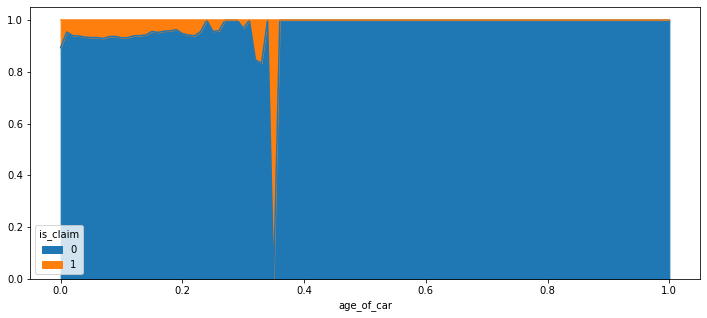

<AxesSubplot:xlabel='age_of_car'>

In [30]:
age_car_and_claim = pd.crosstab(df1['age_of_car'],df['is_claim'])
age_car_and_claim_percent = age_car_and_claim.apply(lambda r: r/r.sum(), axis=1)
age_car_and_claim_percent_fig = age_car_and_claim_percent.plot.area(figsize = (12,5))
plt.show()
age_car_and_claim_percent_fig

#Policy holders of the newer cars tend to make more claims

In [31]:
pd.crosstab(df1['is_speed_alert'],df1['is_claim']).apply(lambda r: r/r.sum(), axis=1)

is_claim,0,1
is_speed_alert,,
0,0.958678,0.041322
1,0.935891,0.064109


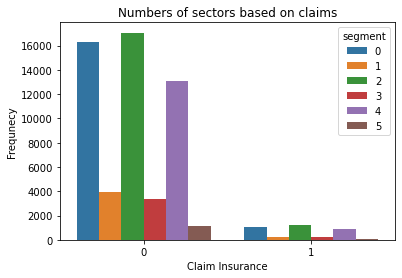

In [32]:
# Numbers of segments based on cliams

ffg = df.groupby("is_claim")["segment"].value_counts().rename("Frequency").to_frame().reset_index()
sns.barplot(x="is_claim",
           y="Frequency",
           hue="segment",
           data=ffg)
plt.xlabel("Claim Insurance")
plt.ylabel("Frequnecy")
plt.title("Numbers of sectors based on claims")
plt.show()

#comparision between cars segment and type of claims.

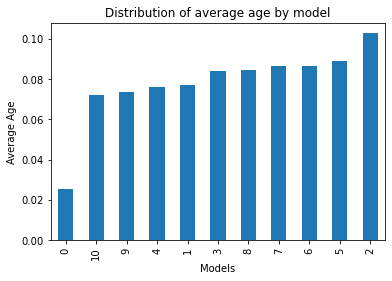

In [33]:
## distribution of average age by model
df.groupby("model")["age_of_car"].mean().sort_values().plot(kind="bar")
plt.xlabel("Models")
plt.ylabel("Average Age")
plt.title("Distribution of average age by model");
plt.show()

#Distribution of the average age segment wise.